In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import es_utils



df = pd.read_csv('output/table_8.csv')

#df = es_utils.pdf.concat_row_to_columns(df, 3)



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       147 non-null    int64  
 1   class            147 non-null    object 
 2   material         122 non-null    object 
 3   phase_change_T   120 non-null    float64
 4   sp_latent_heat   118 non-null    float64
 5   density          88 non-null     object 
 6   kth              22 non-null     object 
 7   vol_latent_heat  66 non-null     float64
 8   cost             76 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 10.5+ KB


<AxesSubplot:>

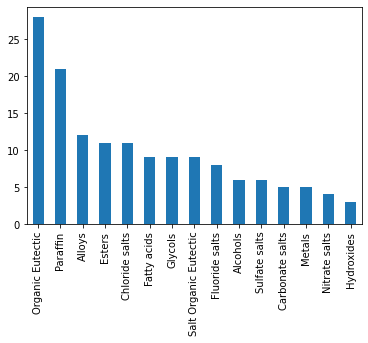

In [2]:
df['class'].value_counts().plot(kind='bar')

In [3]:

df_phys = df[['class','cost','sp_latent_heat']]
df_phys

,class,cost,sp_latent_heat
0,Parafﬁn,10.0,0.060000
1,Parafﬁn,200.0,0.044444
2,Parafﬁn,10.0,0.063611
3,Parafﬁn,330.0,0.057222
4,Parafﬁn,414.0,0.065556
...,...,...,...
142,Salt Organic Eutectic,NaN,0.035278
143,Salt Organic Eutectic,NaN,0.026389
144,Salt Organic Eutectic,NaN,0.052222
145,Salt Organic Eutectic,NaN,0.037778


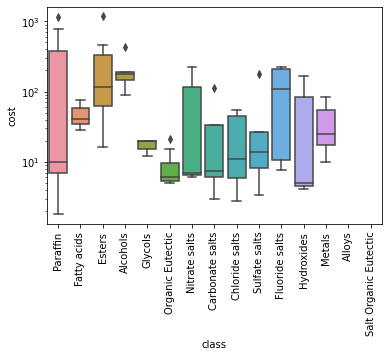

In [4]:
import seaborn as sns

sns.boxplot(x='class',y='cost',data=df_phys)
plt.xticks(rotation=90)
plt.yscale('log')

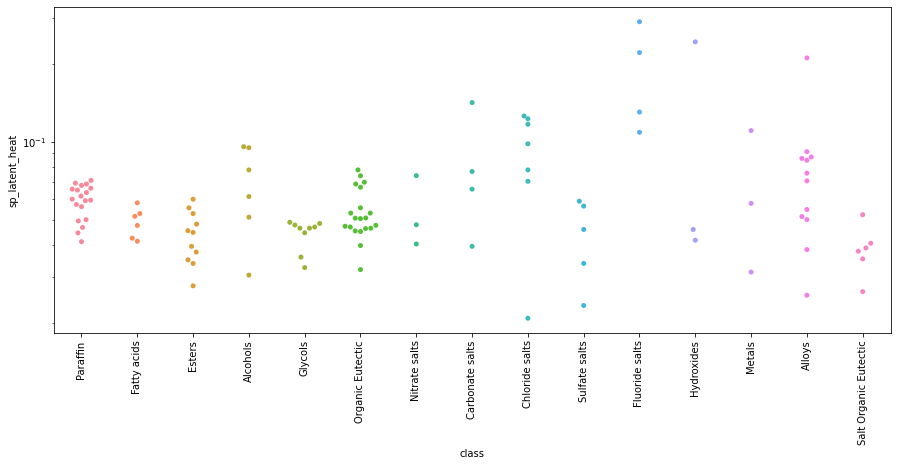

In [5]:

df_plot = df_phys#.where(df_phys['class'] == 'Glycols')

plt.figure(figsize = (15,6))
sns.swarmplot(x='class',y='sp_latent_heat',data=df_plot)
plt.xticks(rotation=90)

plt.yscale('log')

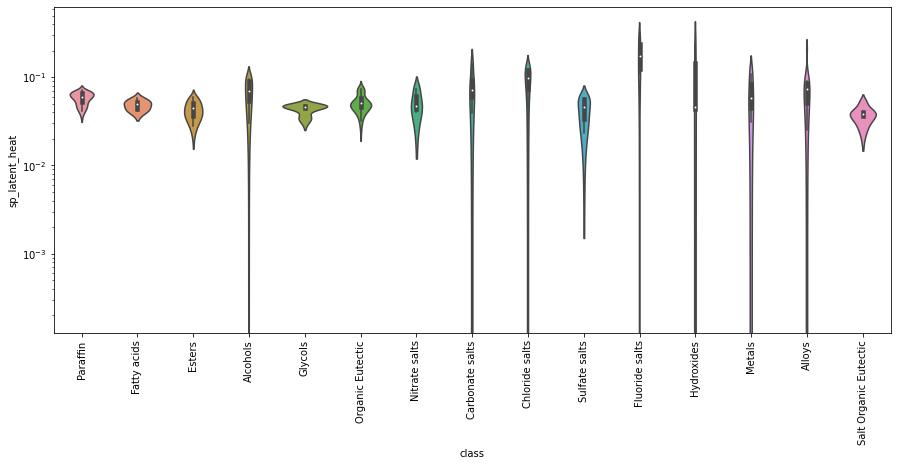

In [8]:

plt.figure(figsize = (15,6))
sns.violinplot(x='class',y='sp_latent_heat',data=df_phys)
plt.xticks(rotation=90)
plt.yscale('log')
# plt.ylim(1e1,)
# plt.ylim(0,)

Text(0.5, 0, 'Latent Heat (kJ/kg')

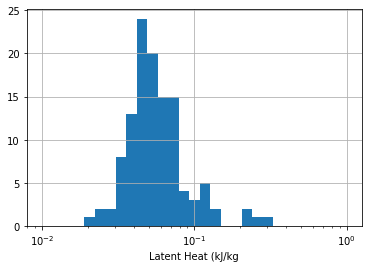

In [10]:
import numpy as np
bins = np.logspace(np.log10(1e-2), np.log10(1), 30)
df['sp_latent_heat'].hist(bins=bins)
plt.xscale('log')
plt.xlabel('Latent Heat (kJ/kg')

Text(0.5, 0, 'Cost ($/kg)')

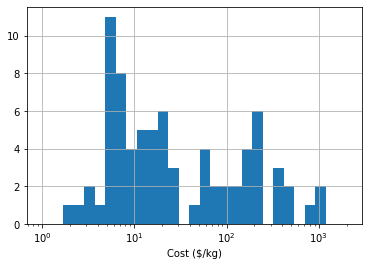

In [11]:

bins = np.logspace(np.log10(1e0), np.log10(2e3), 30)
df['cost'].hist(bins=bins)
plt.xscale('log')
plt.xlabel('Cost ($/kg)')


array([[<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='phase_change_T', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='sp_latent_heat', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='vol_latent_heat', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='cost', ylabel='Unnamed: 0'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='phase_change_T'>,
        <AxesSubplot:xlabel='phase_change_T', ylabel='phase_change_T'>,
        <AxesSubplot:xlabel='sp_latent_heat', ylabel='phase_change_T'>,
        <AxesSubplot:xlabel='vol_latent_heat', ylabel='phase_change_T'>,
        <AxesSubplot:xlabel='cost', ylabel='phase_change_T'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='sp_latent_heat'>,
        <AxesSubplot:xlabel='phase_change_T', ylabel='sp_latent_heat'>,
        <AxesSubplot:xlabel='sp_latent_heat', ylabel='sp_latent_heat'>,
        <AxesSubplot:xlabel='vol_latent_heat', ylabel='sp_latent_heat'>,
        <AxesSubplot:xlabel='cost', yla

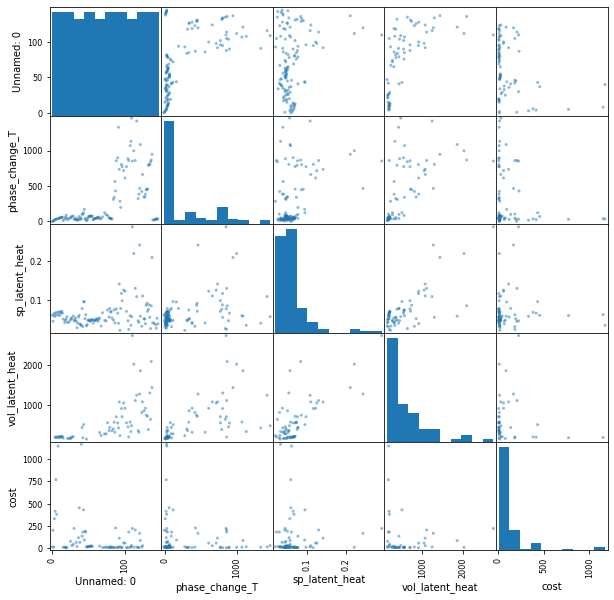

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,10))

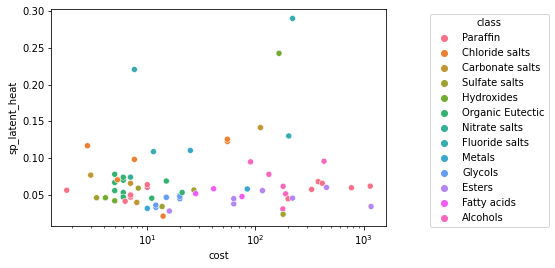

In [13]:

cols = ['class','sp_latent_heat','cost']
df_sel = df.dropna(subset=cols, how='any')[cols]
df_sel = df_sel.sort_values('cost')
g = sns.scatterplot(data=df_sel, x='cost', y='sp_latent_heat', hue='class')
plt.xscale('log')

plt.gca().get_legend().set_bbox_to_anchor([0,0,1.5,1])

#plt.locator_params(axis='x', nbins=5)
#g.set_xticklabels(rotation=45)
#s = df_sel.set_index(['class','cost'])['sp_latent_heat']
#s.groupby('class').plot(x='cost')
#plt.legend()


# Downselect based on phase change T

<AxesSubplot:>

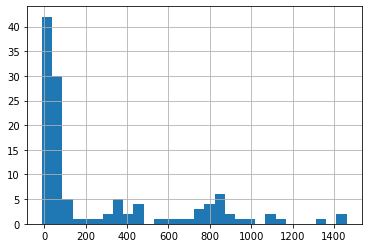

In [18]:
df['phase_change_T'].hist(bins=30)

<AxesSubplot:>

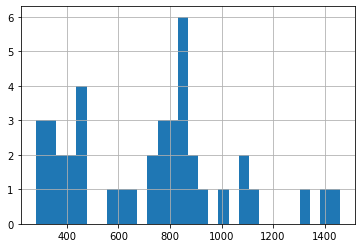

In [19]:
df_highT = df.where(df['phase_change_T'] > 200).dropna(subset=['phase_change_T'])

df_highT['phase_change_T'].hist(bins=30)

In [20]:
df_highT

,Unnamed: 0,class,material,phase_change_T,sp_latent_heat,density,kth,vol_latent_heat,cost
84,84.0,Nitrate salts,NaNO3,306.0,0.047778,2261 (S),NaN,388.9,6.00
85,85.0,Nitrate salts,KNO3,335.0,0.073889,2109(S),0.5,561.0,7.00
86,86.0,Nitrate salts,Ca(NO3)2,560.0,0.040278,2113(S),NaN,306.4,NaN
87,87.0,Nitrate salts,Mg (NO3)2,426.0,NaN,NaN,NaN,NaN,226.00
88,88.0,Carbonate salts,Na2CO3,854.0,0.076667,2533(S),NaN,699.1,3.00
90,90.0,Carbonate salts,K2CO3,897.0,0.065556,2290(S),NaN,540.4,7.00
91,91.0,Carbonate salts,CaCO3,1330.0,0.039444,2930(S),NaN,416.1,8.00
92,92.0,Carbonate salts,Li2CO3,732.0,0.141389,2110(S),NaN,1074.0,111.00
93,93.0,Chloride salts,ZnCl2,280.0,0.020833,2907(S),0.5,218.0,14.00
95,95.0,Chloride salts,NaCl,802.0,0.116667,2160(S),NaN,907.2,2.80
